In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import acf, pacf, ARIMA, ArmaProcess
from statsmodels.tsa.stattools import kpss, adfuller, ccf, ccovf

### 讀取資料

In [2]:
horizon = pd.read_csv(".\\data\\horizon_final.csv", encoding="utf-8").iloc[:, :-1]
print(horizon.shape)
horizon.head()

(3193, 12)


,平均有效時脈 [兆赫],CPU整體功耗 [W],CPU [℃],CPU [RPM],SSD讀取率 [MB/s],GPU 溫度 [℃],GPU 記憶體溫度 [℃],GPU核心電壓 [V],GPU 能量消耗 [W],GPU 有效時脈 [兆赫],分配的 GPU 記憶體 [兆字節],幀率 [FPS]
0,2295.4,99.895,54.0,1494,0.000,76.5,80,1.056,305.353,1950.3,9032,113
1,2598.2,104.135,55.5,1481,0.947,76.9,80,1.056,341.418,1941.3,9032,146
2,2741.5,107.012,56.0,1538,0.400,77.1,82,1.056,345.209,1948.2,9034,147
3,2660.6,105.918,56.0,1530,0.349,76.9,82,1.031,342.610,1937.2,9034,150
4,2598.3,103.853,55.5,1517,0.756,76.7,82,1.031,345.456,1936.8,9034,152


In [3]:
en_col = [
    "Average Effective Clock",
    "CPU Overall Power Consumption",
    "CPU [℃]",
    "CPU [RPM]",
    "SSD Reading Rate [MB/s]",
    # "Total Host Writes [Mega bytes]",
    "GPU Temperature [℃]",
    "GPU Memory Temperature",
    "GPU Core Voltage",
    "GPU Power",
    "GPU Effective Clock",
    "GPU Memory Allocated",
    "FPS"
]

In [4]:
horizon = horizon.rename(columns=dict(zip(horizon.columns, en_col)))

### 12個變量

In [5]:
for (i, v) in enumerate(horizon.columns):
    print("The p-value of ", v, " is ", adfuller(horizon[horizon.columns[i]])[1])

The p-value of  Average Effective Clock  is  5.158405372409776e-09
The p-value of  CPU Overall Power Consumption  is  7.533724300144683e-07
The p-value of  CPU [℃]  is  4.428767849456626e-06
The p-value of  CPU [RPM]  is  3.438737578757631e-05
The p-value of  SSD Reading Rate [MB/s]  is  0.0
The p-value of  GPU Temperature [℃]  is  2.2900628028127802e-08
The p-value of  GPU Memory Temperature  is  3.5839734898119773e-09
The p-value of  GPU Core Voltage  is  3.1718614600317663e-07
The p-value of  GPU Power  is  6.836656196582732e-13
The p-value of  GPU Effective Clock  is  0.0
The p-value of  GPU Memory Allocated  is  0.0029314351677209942
The p-value of  FPS  is  1.482038942115498e-07


array([[<AxesSubplot:title={'center':'Average Effective Clock'}>,
        <AxesSubplot:title={'center':'CPU Overall Power Consumption'}>,
        <AxesSubplot:title={'center':'CPU [℃]'}>],
       [<AxesSubplot:title={'center':'CPU [RPM]'}>,
        <AxesSubplot:title={'center':'SSD Reading Rate [MB/s]'}>,
        <AxesSubplot:title={'center':'GPU Temperature [℃]'}>],
       [<AxesSubplot:title={'center':'GPU Memory Temperature'}>,
        <AxesSubplot:title={'center':'GPU Core Voltage'}>,
        <AxesSubplot:title={'center':'GPU Power'}>],
       [<AxesSubplot:title={'center':'GPU Effective Clock'}>,
        <AxesSubplot:title={'center':'GPU Memory Allocated'}>,
        <AxesSubplot:title={'center':'FPS'}>]], dtype=object)

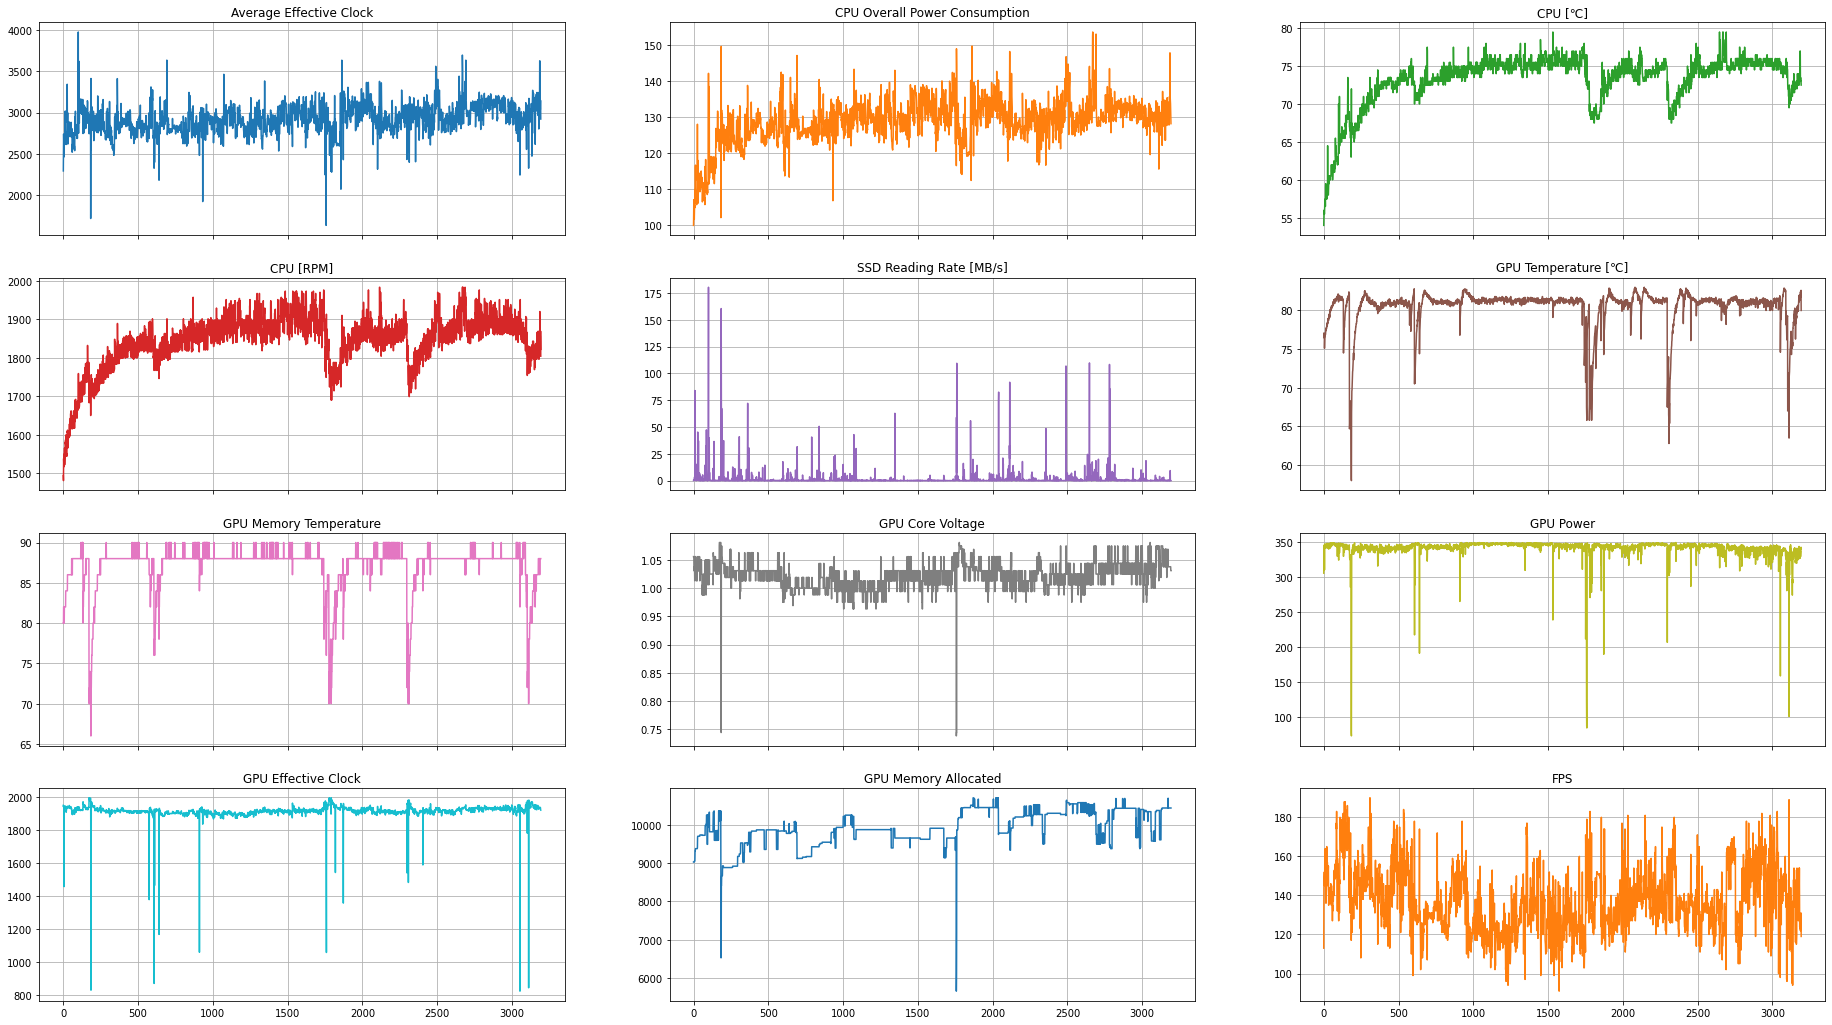

In [6]:
horizon.plot(
    subplots=True, layout=(4, 3), figsize=(32, 18),
    grid=True, legend=False,
    title=list(horizon.columns)
)

In [7]:
for (i, v) in enumerate(horizon.columns):
    print("The p-value of ", v, " is ", adfuller(horizon[horizon.columns[i]].diff().dropna())[1])

The p-value of  Average Effective Clock  is  6.068356818577565e-29
The p-value of  CPU Overall Power Consumption  is  1.6066321818986703e-28
The p-value of  CPU [℃]  is  0.0
The p-value of  CPU [RPM]  is  0.0
The p-value of  SSD Reading Rate [MB/s]  is  3.111449055452927e-29
The p-value of  GPU Temperature [℃]  is  1.490991033206935e-25
The p-value of  GPU Memory Temperature  is  2.36063536280294e-25
The p-value of  GPU Core Voltage  is  0.0
The p-value of  GPU Power  is  1.8864938050079884e-29
The p-value of  GPU Effective Clock  is  2.0225682954093973e-30
The p-value of  GPU Memory Allocated  is  1.0967071241549319e-29
The p-value of  FPS  is  0.0


In [8]:
horizon_diff = horizon.diff().dropna()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

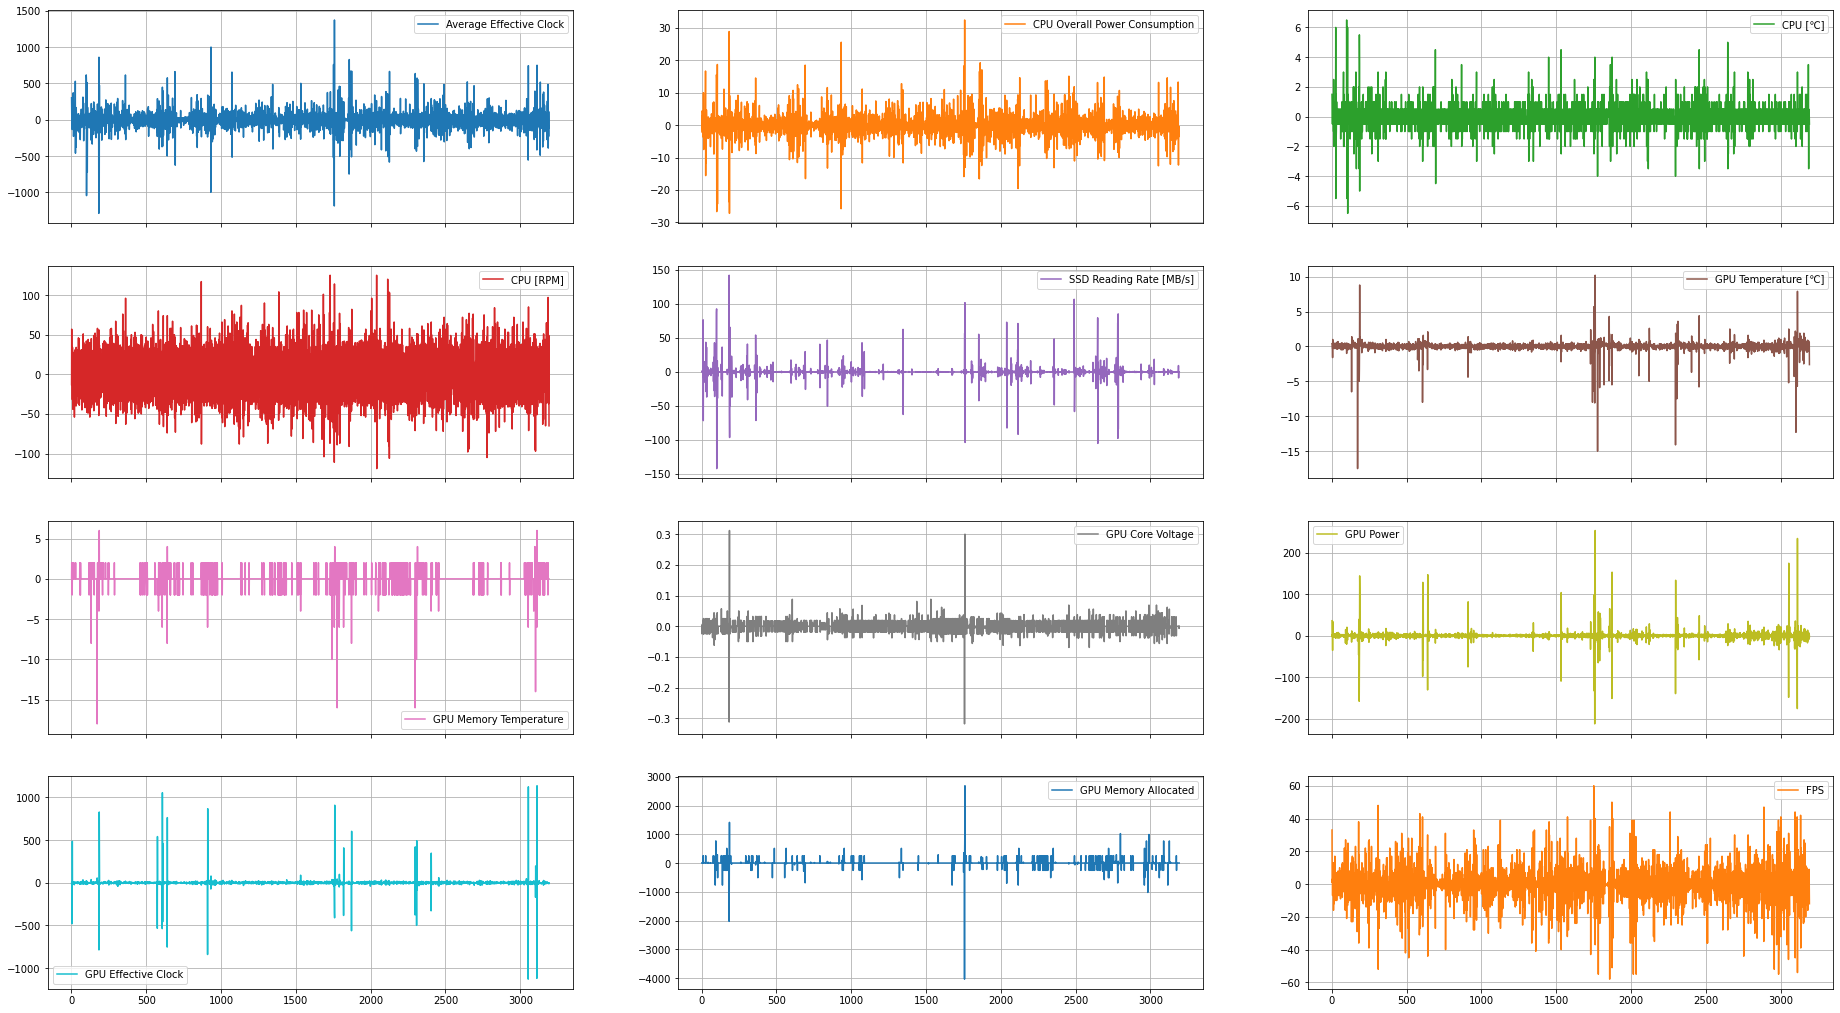

In [9]:
horizon_diff.plot(
    subplots=True, layout=(4, 3),
    figsize=(32, 18), grid=True
)

In [10]:
for (i, v) in enumerate(horizon_diff.columns):
    if v == "FPS":
        break
    print(f"Cross-Correlation of FPS and {v}")
    print(ccf(horizon_diff["FPS"], horizon_diff.iloc[:, i])[:12], end="\n")
    print("\n")

Cross-Correlation of FPS and Average Effective Clock
[-0.20796158  0.06981203  0.01016084  0.00975639  0.02750257  0.00133772
 -0.01066995 -0.00416367  0.01755289  0.00474957 -0.01409449  0.02250682]


Cross-Correlation of FPS and CPU Overall Power Consumption
[-0.33217008  0.11286205  0.03061975  0.03112115  0.0174612   0.0035398
 -0.01250377  0.00124628  0.02688754  0.00639875 -0.00727922  0.00165426]


Cross-Correlation of FPS and CPU [℃]
[-0.30509652  0.1013965   0.0205781   0.01538777  0.01757094  0.00531134
  0.00694769 -0.03095179  0.03013269  0.00206471 -0.00989823  0.01843612]


Cross-Correlation of FPS and CPU [RPM]
[-3.15657827e-02  5.96561935e-02 -9.23496299e-05  1.30079199e-02
 -1.65721393e-04  3.45381025e-02 -1.41406837e-02  8.47568173e-03
  2.67068365e-03 -5.38914302e-02  5.82391582e-02 -1.31720309e-02]


Cross-Correlation of FPS and SSD Reading Rate [MB/s]
[-0.11450581  0.04537674 -0.00822664  0.01539145  0.01409381 -0.01143191
 -0.01502362  0.00628286 -0.00694153  0.04

### 選定的變量：Average Effective Clock, CPU Overall Power Consumption, GPU Power, GPU Effective Clock, FPS

In [11]:
horizon5 = pd.read_csv(".\\data\\horizon_multivariate_final.csv", encoding="utf-8")
horizon5_diff = horizon5.diff().dropna()
horizon5.head()

,Average Effective Clock,CPU Overall Power Consumption,GPU Power,GPU Effective Clock,FPS
0,2295.4,99.895,305.353,1950.3,113
1,2598.2,104.135,341.418,1941.3,146
2,2741.5,107.012,345.209,1948.2,147
3,2660.6,105.918,342.610,1937.2,150
4,2598.3,103.853,345.456,1936.8,152


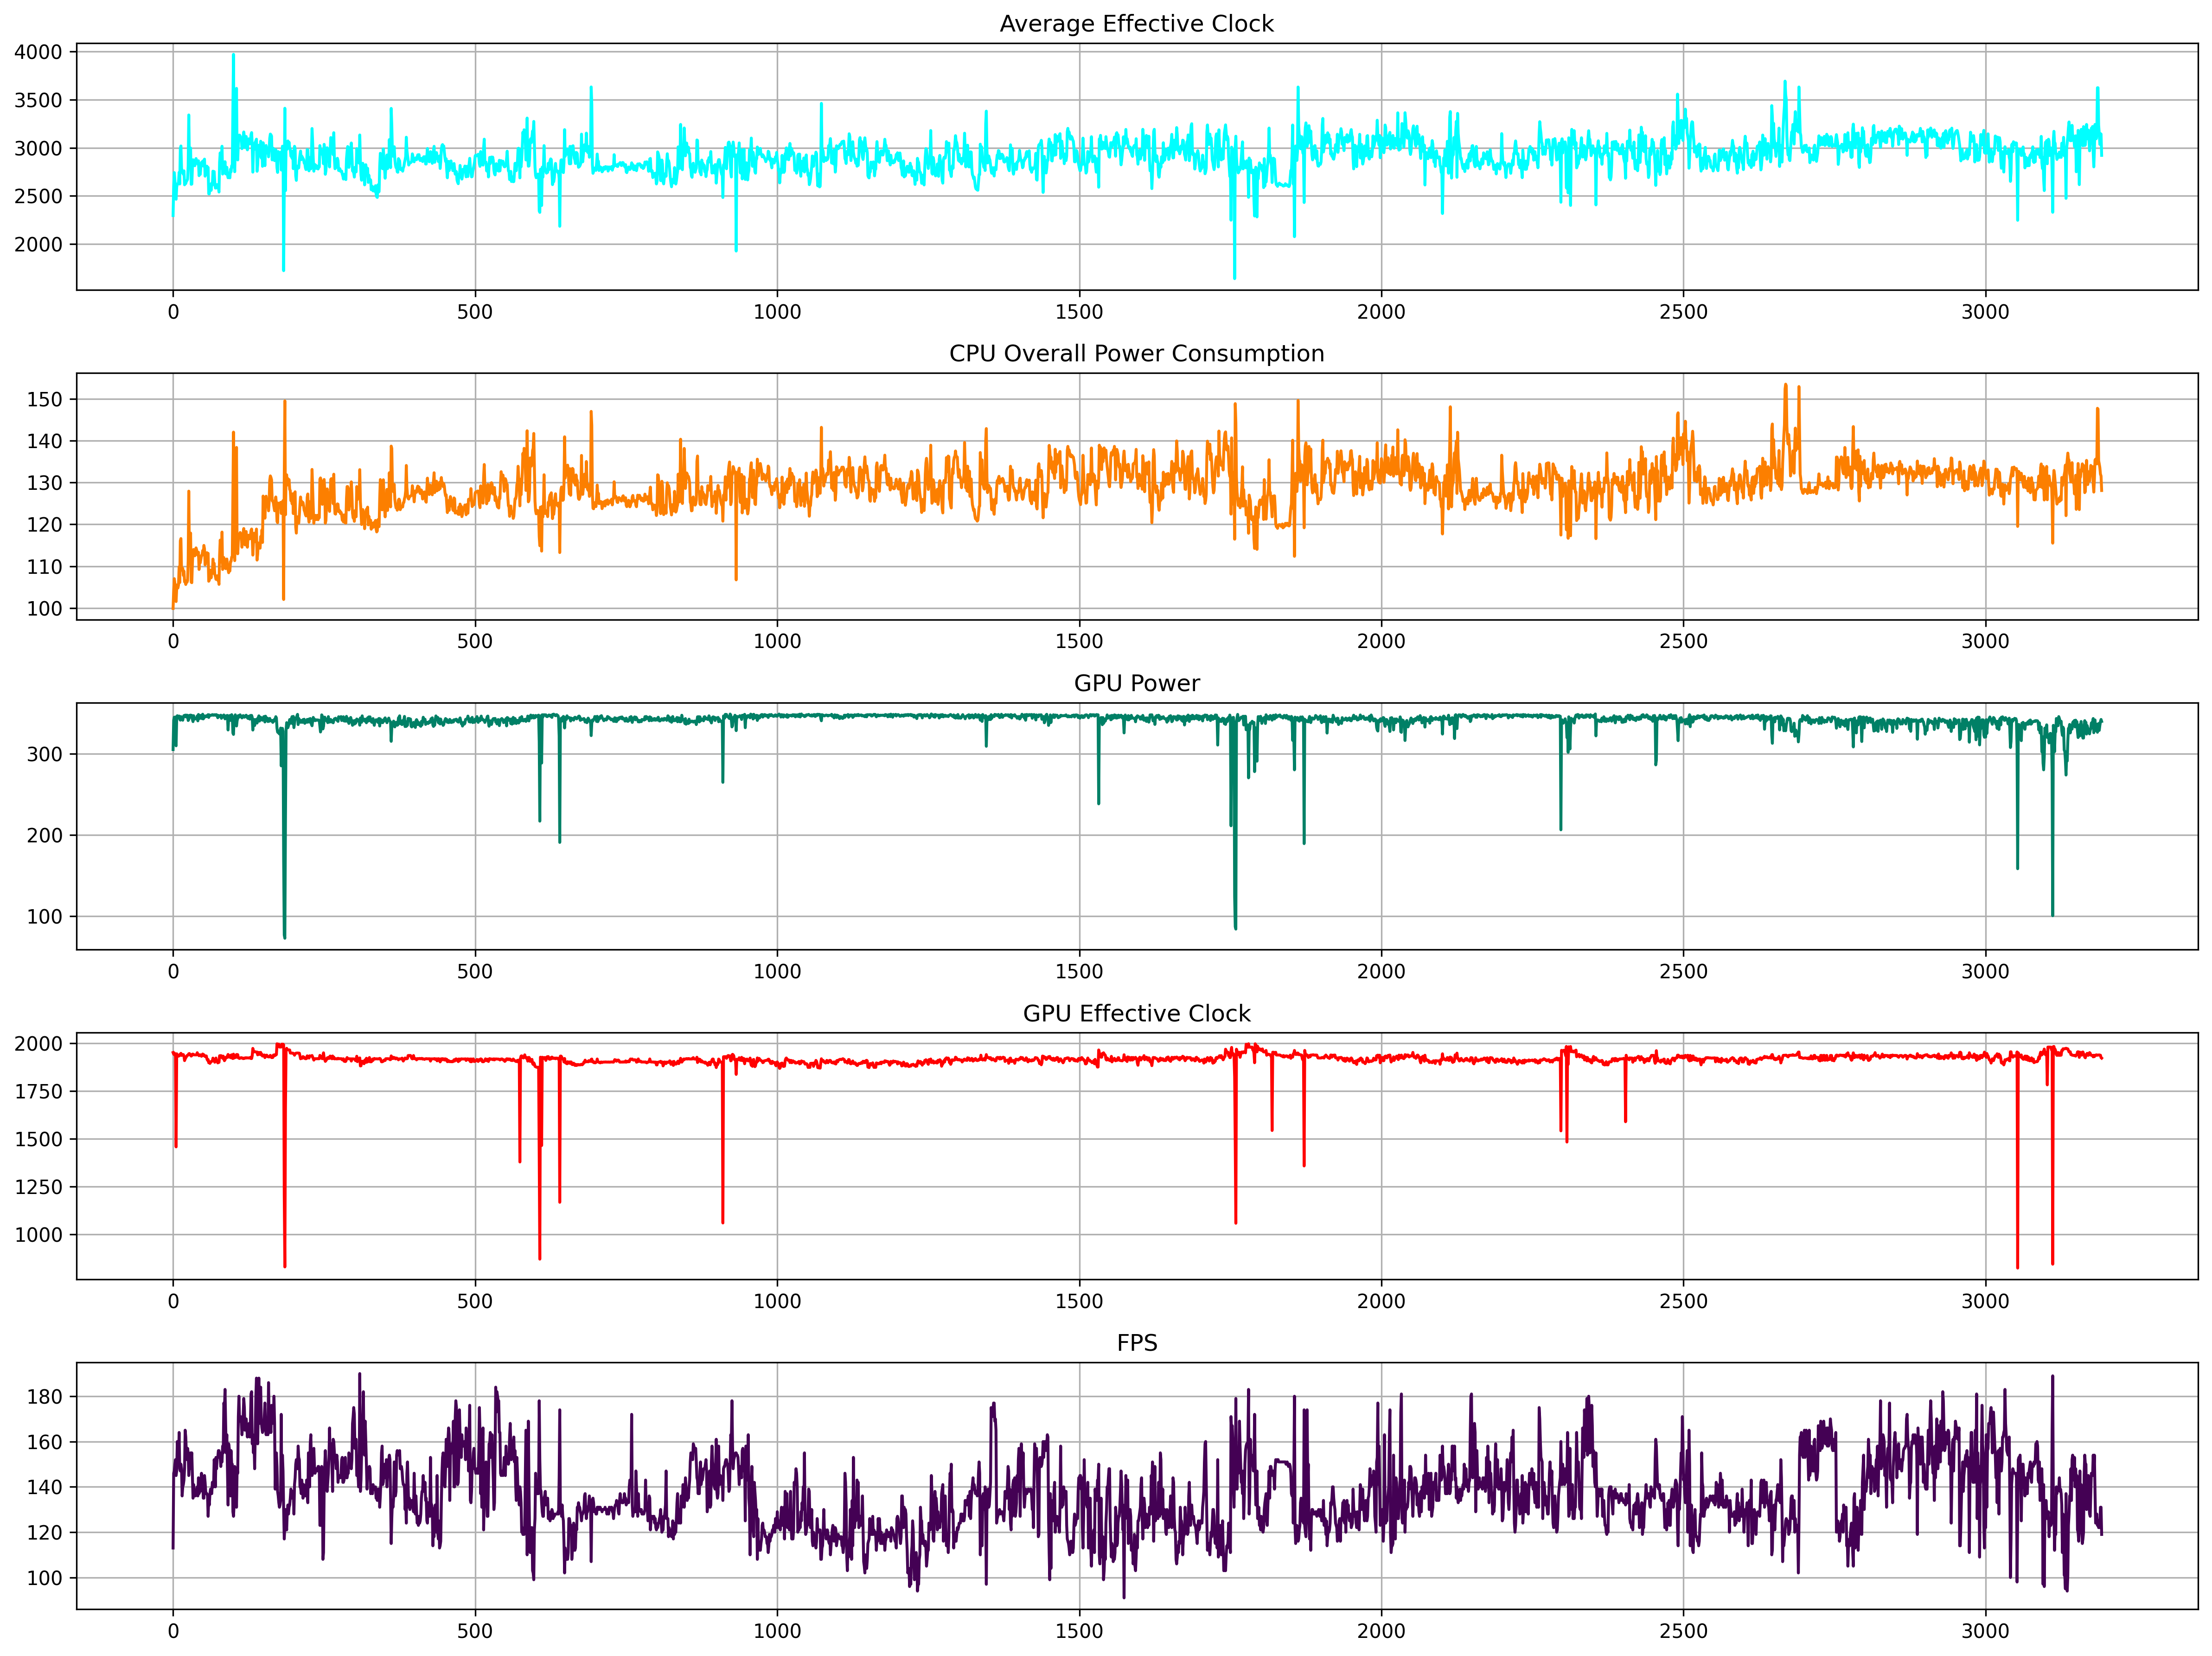

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 12), dpi=300)
color = ["cool", "Wistia_r", "summer", "autumn", "viridis"]
for i, col in enumerate(horizon5.columns):
    horizon5[col].plot(
        ax=ax[i], colormap=color[i],
        grid=True, legend=False,
        title=col
    )
fig.tight_layout()

In [13]:
for (i, v) in enumerate(horizon5.columns):
    print("The p-value of ", v, " is ", adfuller(horizon5[horizon5.columns[i]])[1])

The p-value of  Average Effective Clock  is  5.158405372409776e-09
The p-value of  CPU Overall Power Consumption  is  7.533724300144683e-07
The p-value of  GPU Power  is  6.836656196582732e-13
The p-value of  GPU Effective Clock  is  0.0
The p-value of  FPS  is  1.482038942115498e-07


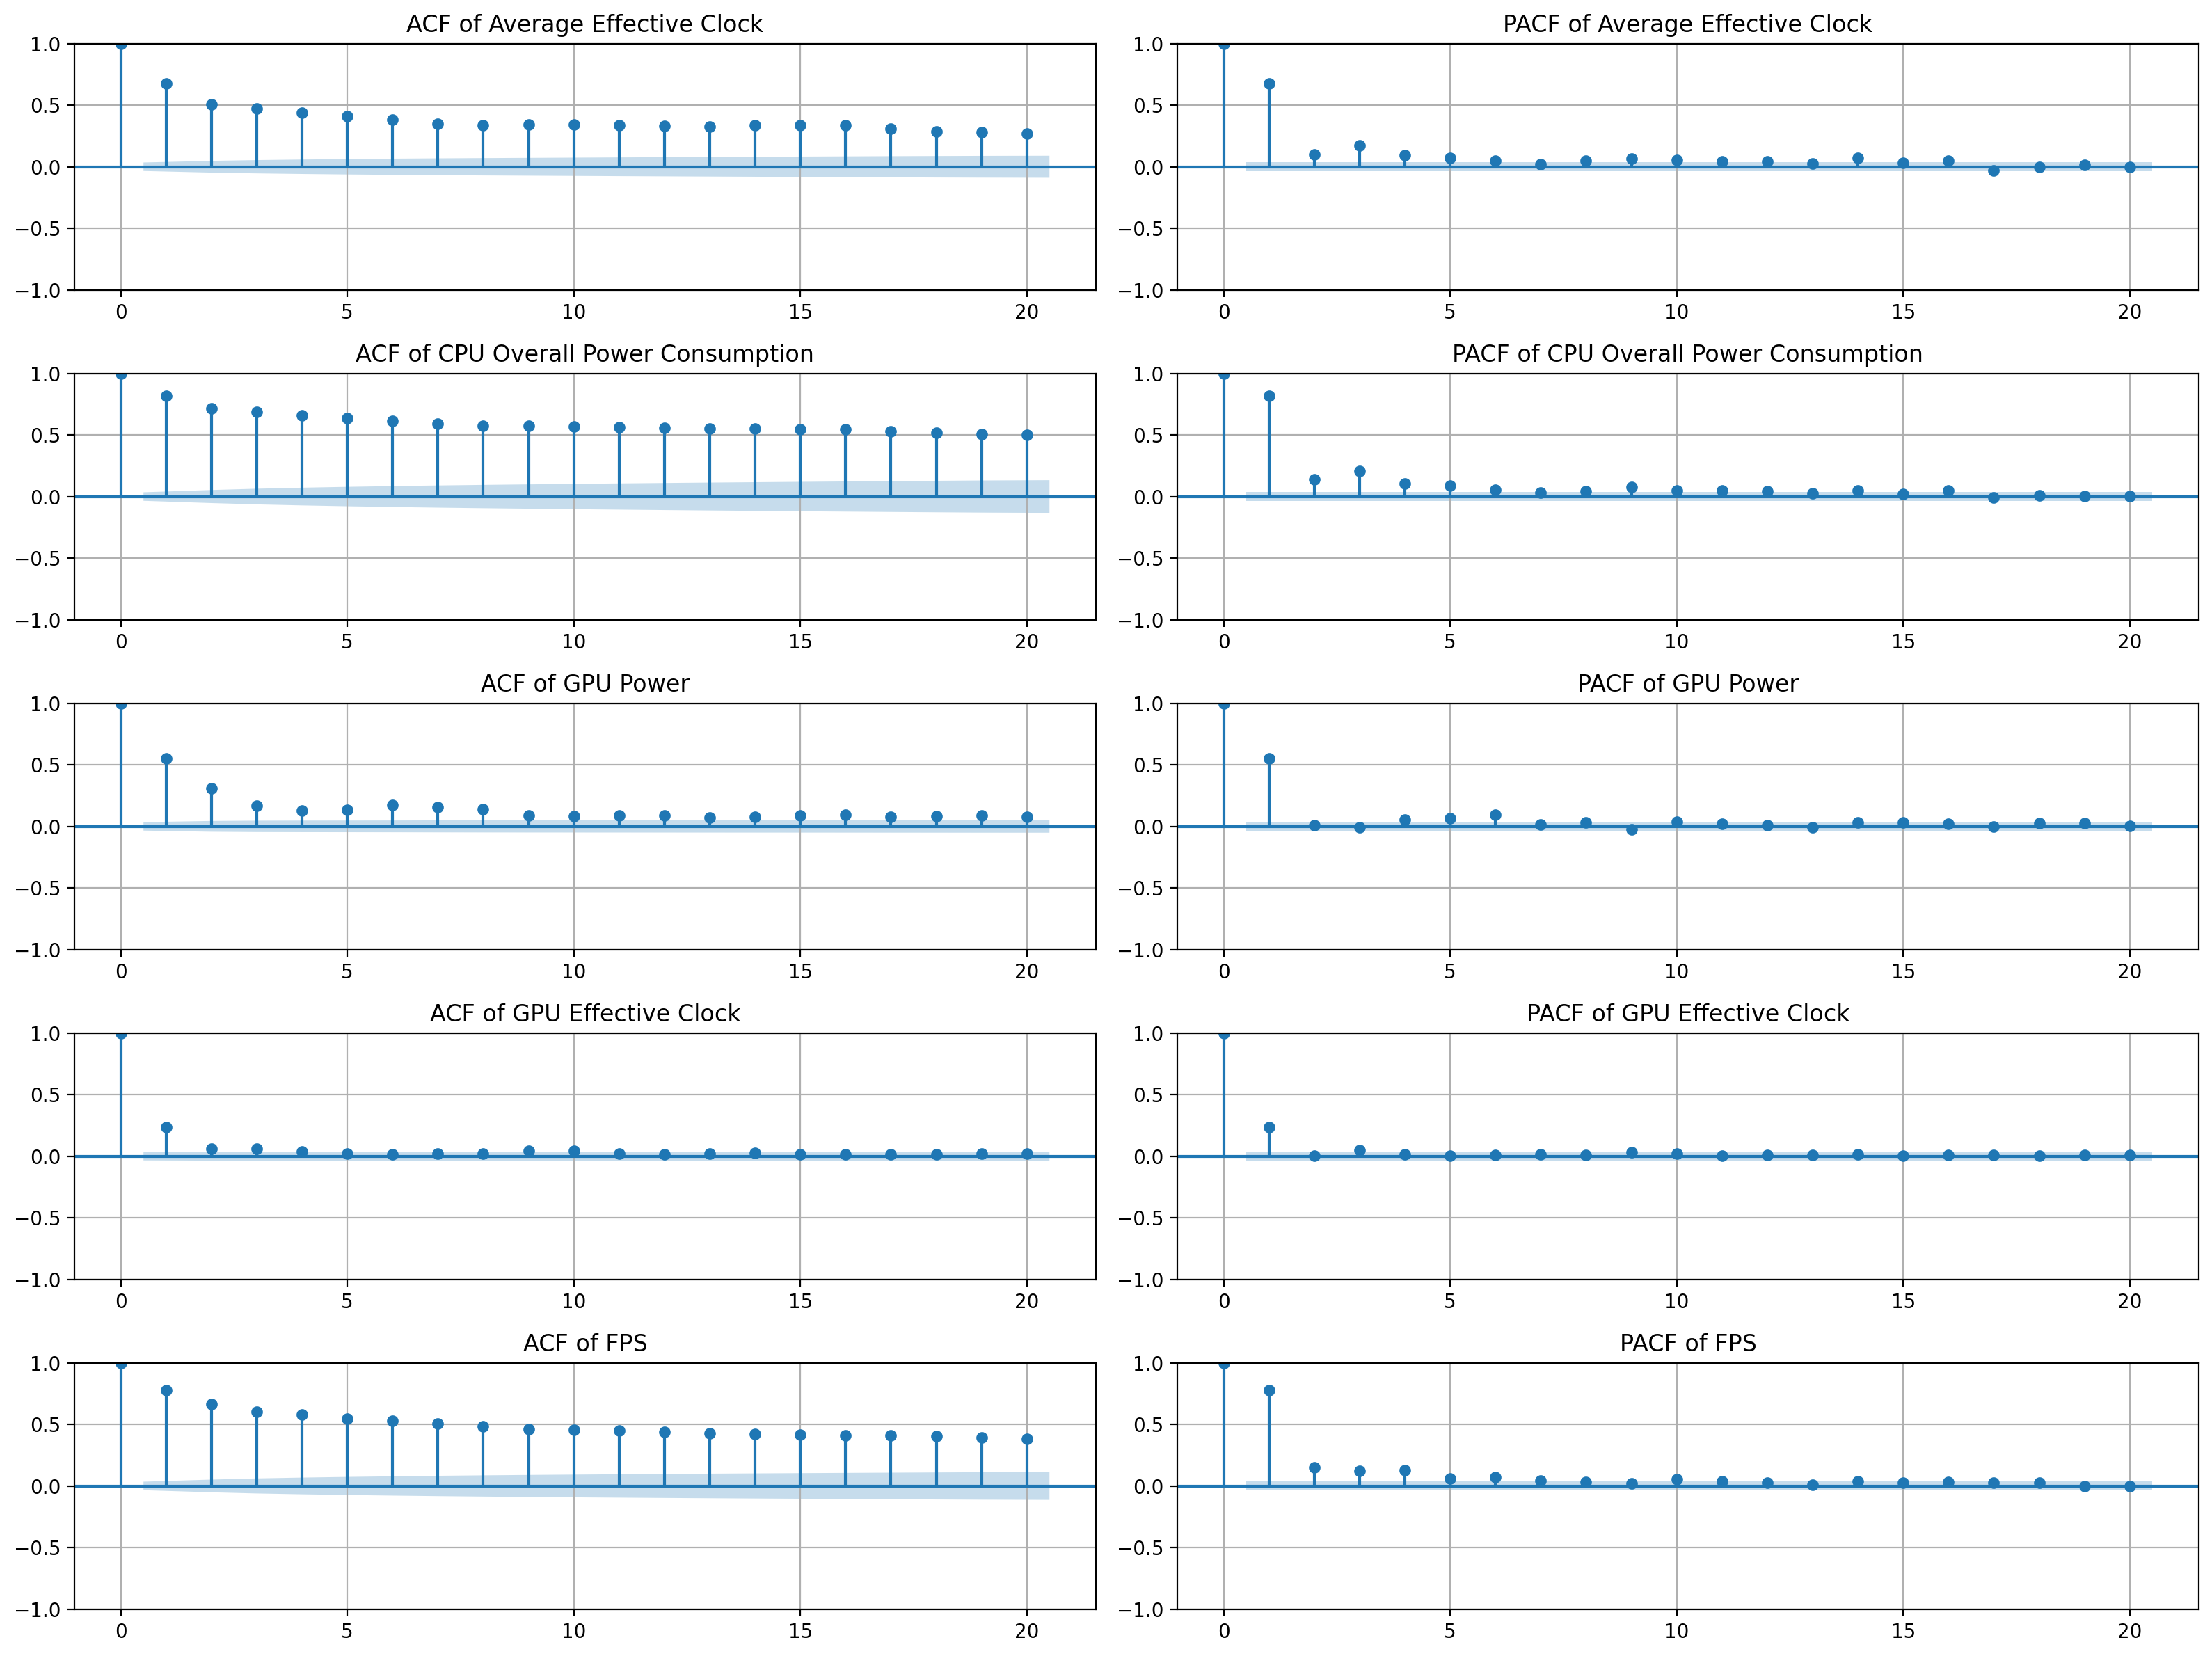

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,12), dpi=200)
for i, col in enumerate(horizon5.columns):
    ax[i][0].grid()
    ax[i][1].grid()
    plot_acf(horizon5[col], lags=20, alpha=0.05, ax=ax[i][0])
    plot_pacf(horizon5[col], lags=20, alpha=0.05, ax=ax[i][1], method="ywm")
    ax[i][0].set_title("ACF of "+col)
    ax[i][1].set_title("PACF of "+col)
fig.tight_layout()

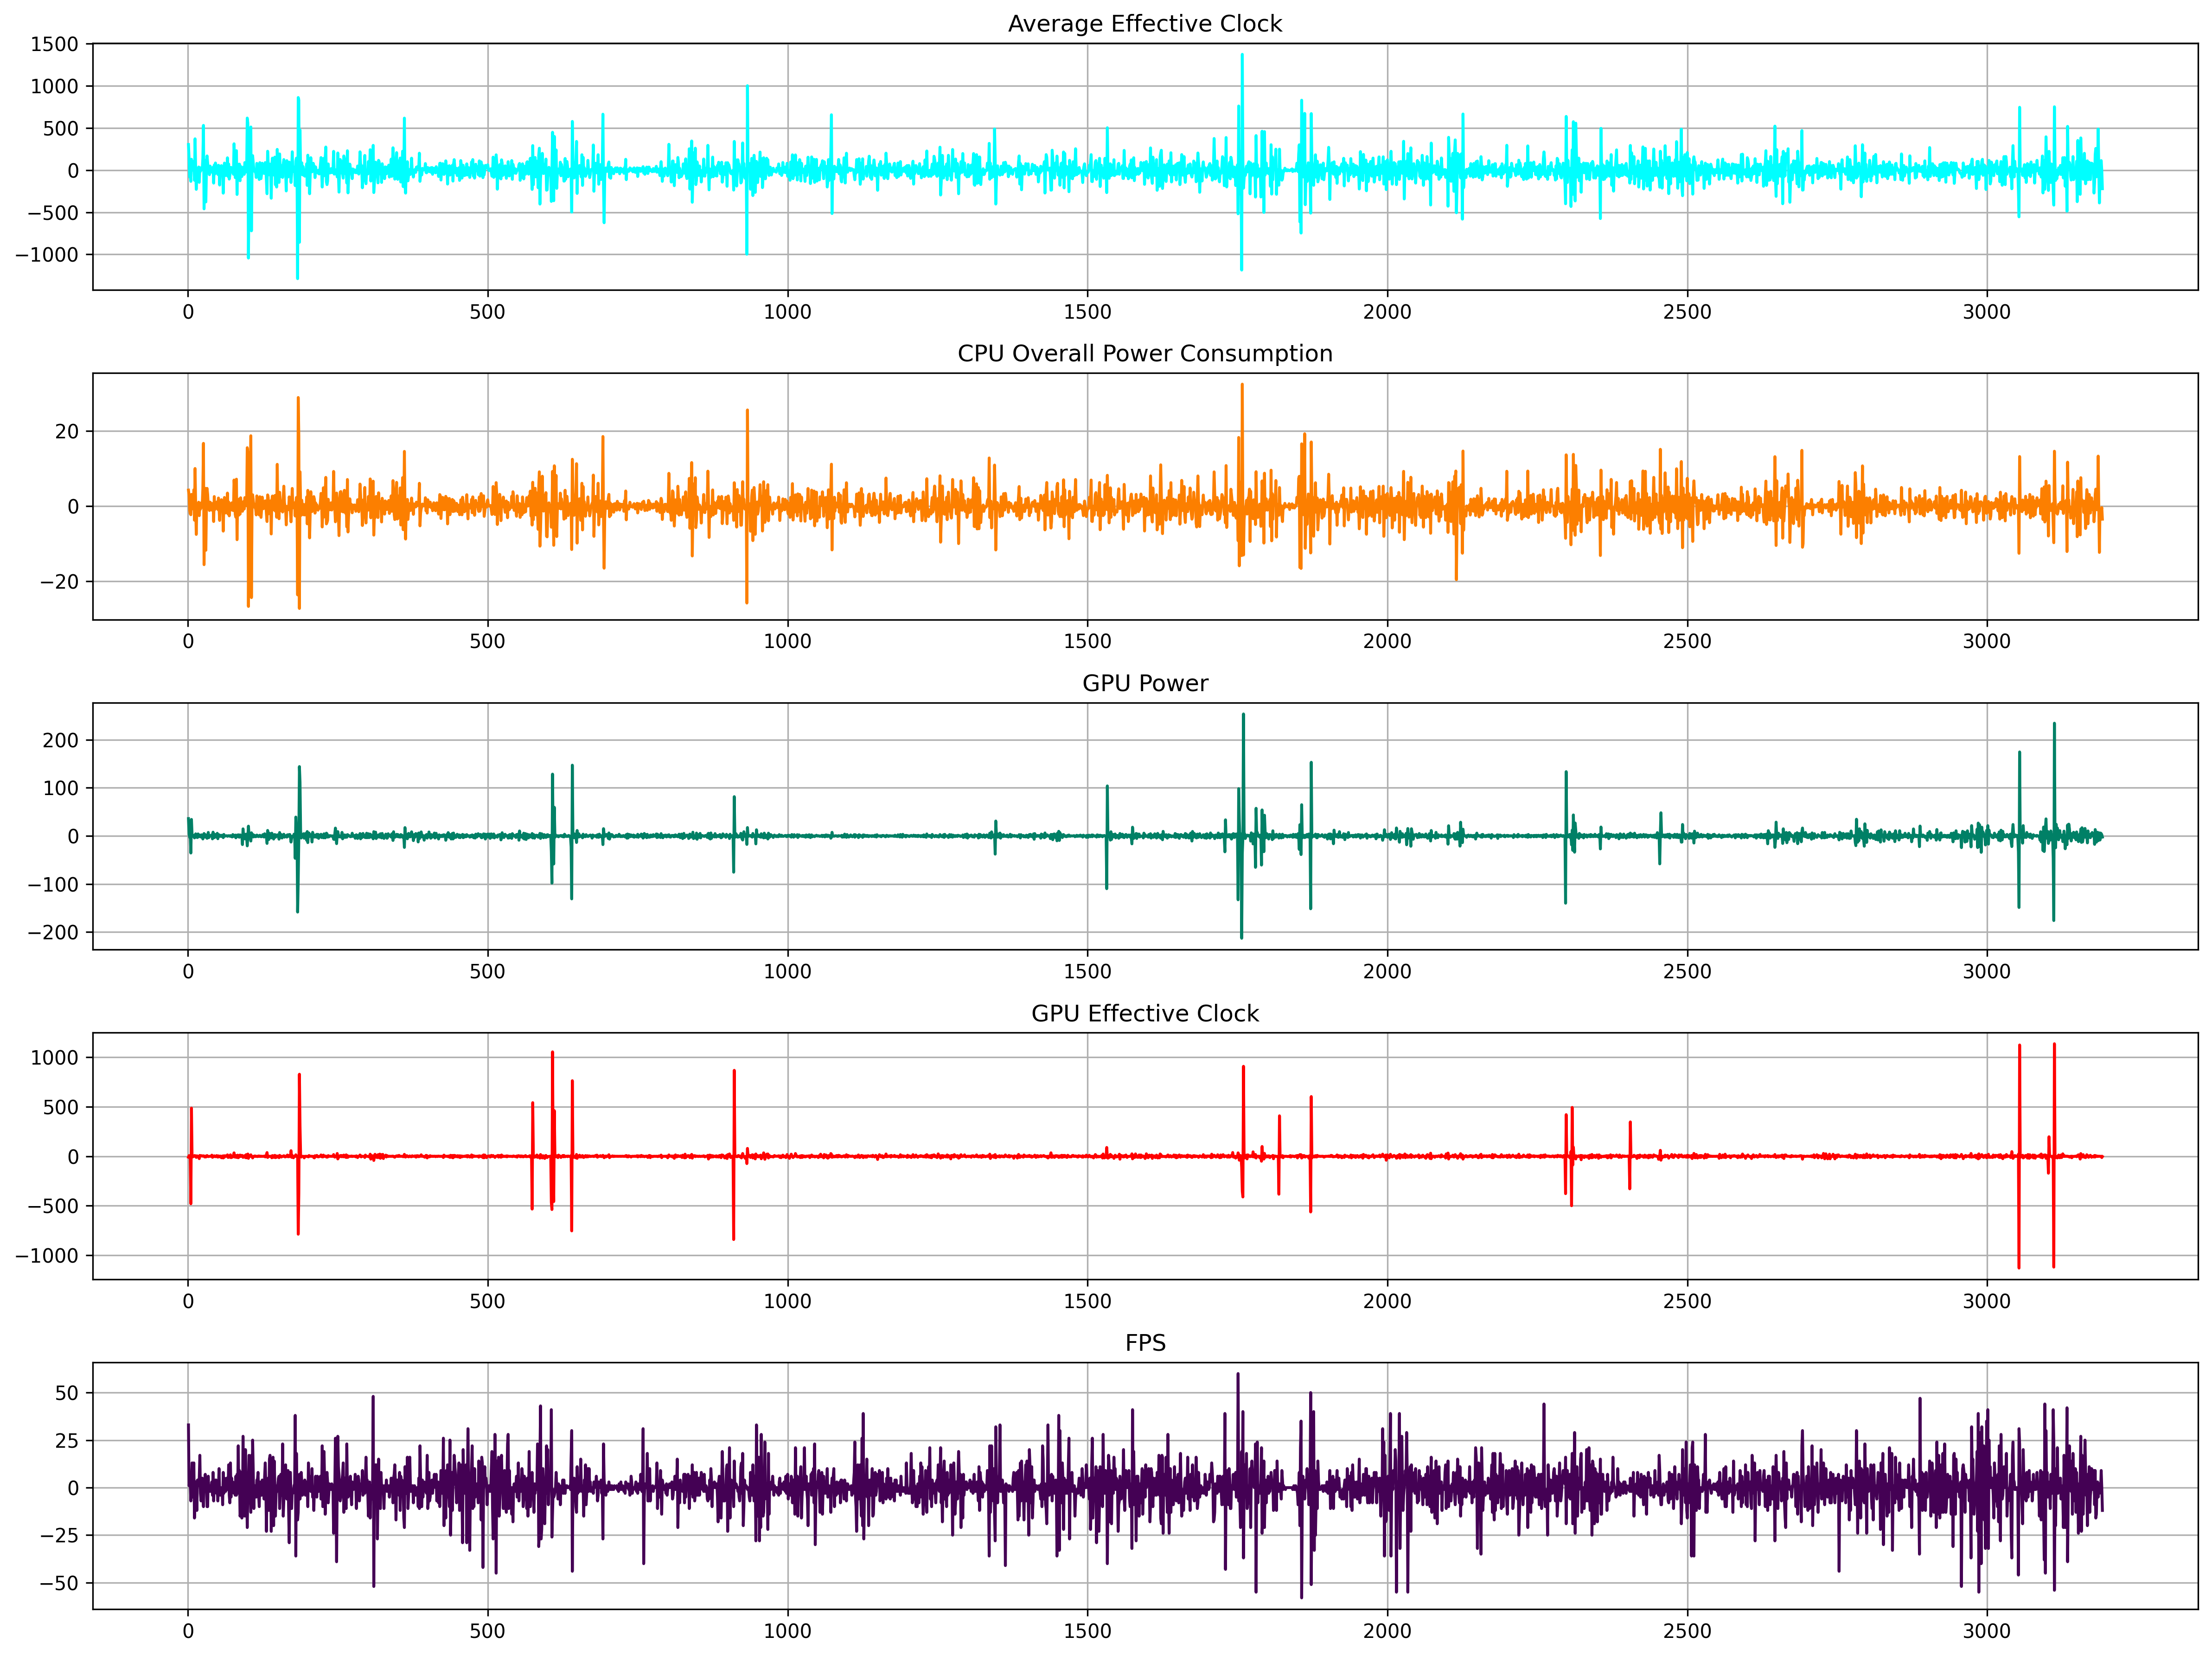

In [22]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 12), dpi=300)
color = ["cool", "Wistia_r", "summer", "autumn", "viridis"]
for i, col in enumerate(horizon5_diff.columns):
    horizon5_diff[col].plot(
        ax=ax[i], colormap=color[i],
        grid=True, legend=False,
        title=col
    )
fig.tight_layout()

In [16]:
for (i, v) in enumerate(horizon5_diff.columns):
    print("The p-value of ", v, " is ", adfuller(horizon5_diff[horizon5_diff.columns[i]])[1])

The p-value of  Average Effective Clock  is  6.068356818577565e-29
The p-value of  CPU Overall Power Consumption  is  1.6066321818986703e-28
The p-value of  GPU Power  is  1.8864938050079884e-29
The p-value of  GPU Effective Clock  is  2.0225682954093973e-30
The p-value of  FPS  is  0.0


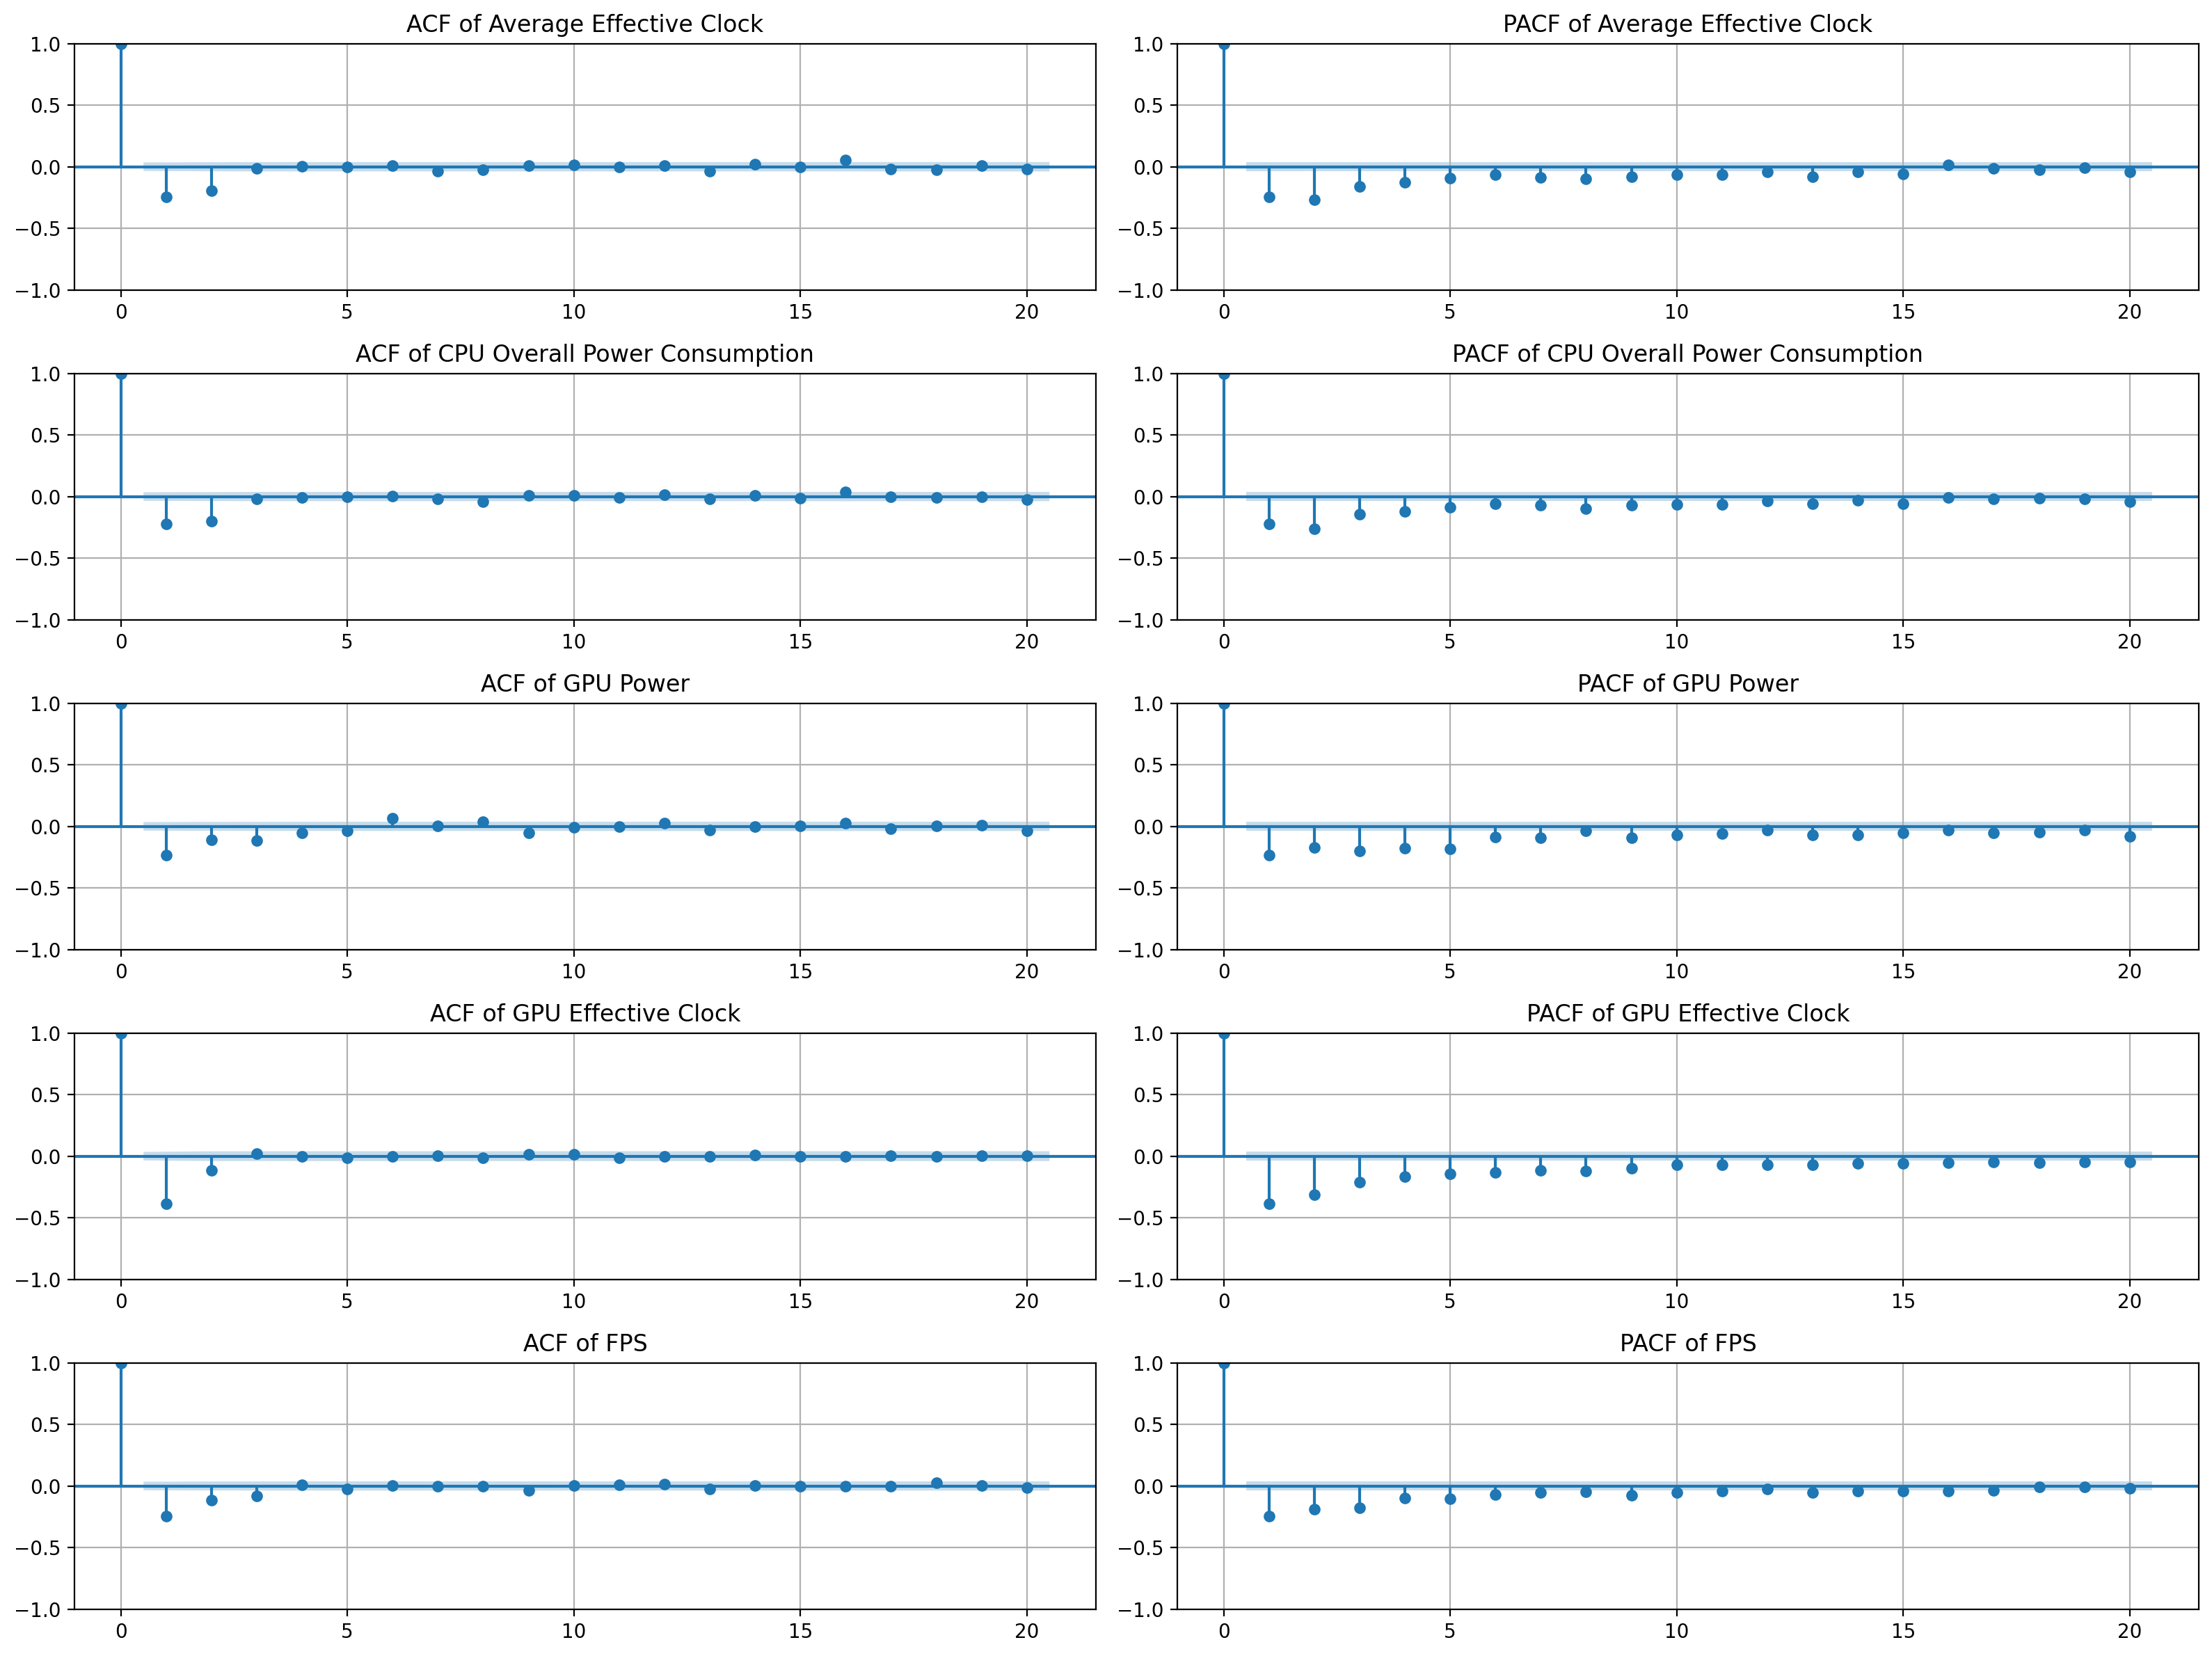

In [23]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 12), dpi=200)
for i, col in enumerate(horizon5_diff.columns):
    ax[i][0].grid()
    ax[i][1].grid()
    plot_acf(horizon5_diff[col], lags=20, alpha=0.05, ax=ax[i][0])
    plot_pacf(horizon5_diff[col], lags=20, alpha=0.05, ax=ax[i][1], method="ywm")
    ax[i][0].set_title("ACF of "+col)
    ax[i][1].set_title("PACF of "+col)
fig.tight_layout()